In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from utils.medical_datasets import Cataract1KDataset
from utils.dataset_utils import ZEISS_TO_CATARACT1K

In [8]:
class_mappings = {
    cataract_cat: zeiss_cat
    for zeiss_cat, cataract_list in ZEISS_TO_CATARACT1K.items()
    for cataract_cat in cataract_list
}
dataset = Cataract1KDataset(
        root_folder="data/cataract-1k",
        image_transform=None,
        mask_transform=None,
        class_mappings=class_mappings,
        return_path=True,
    )

In [9]:
for i, items in enumerate(dataset.imgs.items()):
    k, v = items
    if "case5319_06.png" in v.path:
        print(i, k, v)

347 248229029 ImageInfo(path='data/cataract-1k/Annotations/Images-and-Supervisely-Annotations/case_5319/img/case5319_06.png', category_id=[8, 3, 11], segmentation=[[[758.0, 767.0, 735.0, 752.0, 715.0, 733.0, 701.0, 716.0, 689.0, 699.0, 669.0, 680.0, 653.0, 659.0, 639.0, 644.0, 627.0, 619.0, 620.0, 590.0, 612.0, 570.0, 610.0, 542.0, 609.0, 515.0, 609.0, 501.0, 622.0, 512.0, 647.0, 532.0, 663.0, 547.0, 683.0, 566.0, 701.0, 581.0, 712.0, 597.0, 723.0, 630.0, 737.0, 660.0, 749.0, 696.0, 760.0, 720.0, 772.0, 744.0, 787.0, 767.0]], [[550.0, 260.0, 577.0, 262.0, 602.0, 271.0, 621.0, 282.0, 638.0, 296.0, 652.0, 311.0, 668.0, 328.0, 681.0, 347.0, 691.0, 369.0, 694.0, 394.0, 695.0, 420.0, 694.0, 444.0, 687.0, 466.0, 676.0, 484.0, 659.0, 500.0, 646.0, 511.0, 627.0, 523.0, 611.0, 533.0, 593.0, 541.0, 571.0, 549.0, 547.0, 552.0, 523.0, 550.0, 505.0, 543.0, 487.0, 535.0, 470.0, 524.0, 453.0, 511.0, 440.0, 497.0, 424.0, 480.0, 411.0, 459.0, 405.0, 437.0, 405.0, 412.0, 407.0, 387.0, 414.0, 361.0, 426.

In [33]:
img, mask, path = dataset[347]
print(path)

data/cataract-1k/Annotations/Images-and-Supervisely-Annotations/case_5319/img/case5319_06.png


In [31]:
dataset.categories

{1: 'Cornea',
 2: 'Katena Forceps',
 3: 'cornea1',
 4: 'Lens Injector',
 5: 'Irrigation-Aspiration',
 6: 'Capsulorhexis Forceps',
 7: 'Spatula',
 8: 'pupil1',
 9: 'Phacoemulsification Tip',
 10: 'Incision Knife',
 11: 'Pupil',
 12: 'Slit Knife',
 13: 'Lens',
 14: 'Capsulorhexis Cystotome',
 15: 'Gauge',
 0: 'Background'}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


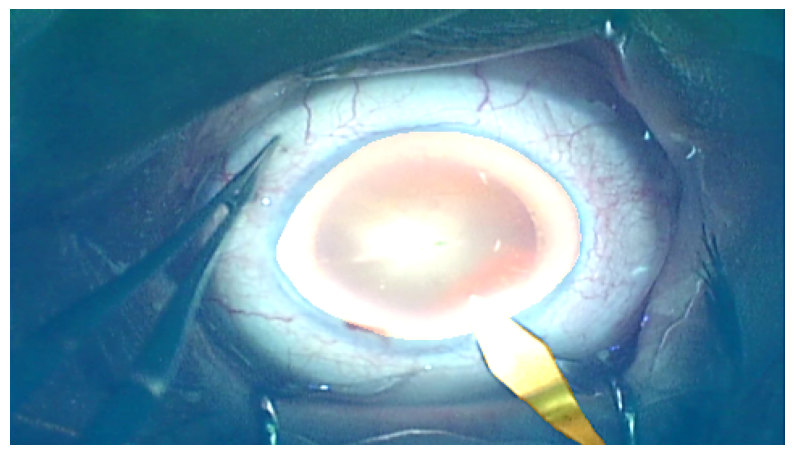

In [32]:
from utils.vis_utils import overlay_mask_on_image

overlay_mask_on_image(img, mask, alpha=0.4)